In [0]:
import pandas as pd
add = pd.read_csv('/Users/dreamus/Desktop/동작구_연령별_통계.csv')

In [0]:
id_vars = ['시도', '시군구', '행정동','latitude', 'longitude']

In [0]:
def melting(col):
    return pd.melt(col, id_vars=id_vars, var_name='sort', value_name='value')


df1 = melting(add)


In [0]:
df1.to_csv('동작구_연령별_통계_v1.csv',encoding='utf-8-sig',index=False)

### <b> 동작구 1차 filter </b>

- index형 데이터 제거, binary class -> one-hot-encoding 변환

In [0]:
import pandas as pd
df = pd.read_csv('/Users/dreamus/Desktop/work/공모전/final.csv')
drop_table = ['province','city','dong','address','latitude','longitude']
read_df = df.drop(drop_table,axis=1)
read_df = pd.get_dummies(read_df)

- feature set을 클러스터링하기 위해 필드 scaling
<br> -> scaler는 z-scale(StandardScaler) </br>

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data = scaler.fit_transform(read_df)
new_df = pd.DataFrame(new_data)
new_df.columns = read_df.columns

- 클러스터 개수를 결정하기 위해 elbow method
<br> 비교 클러스터 개수 범위 : 1~10개 </br>

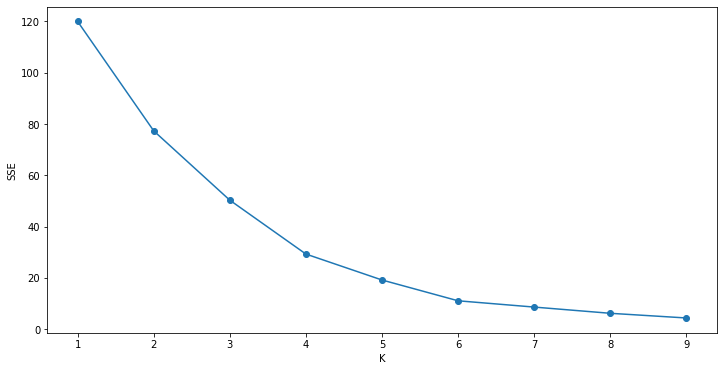

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
plt.figure(figsize=(12, 6))

def elbow(X):
    sse = []

    for i in range(1,10):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,10), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(new_df)

-> SSE가 감소하는 <i><b>4</b></i> 를 클러스터 개수로 결정

<h4> <b> Modeling - 결정된 클러스터 개수로 클러스터링 진행 </b> </h4>

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 4

model = KMeans(n_clusters=k,algorithm='auto')
model.fit(new_df)
predict = pd.DataFrame(model.predict(new_df))
predict.columns=['predict']

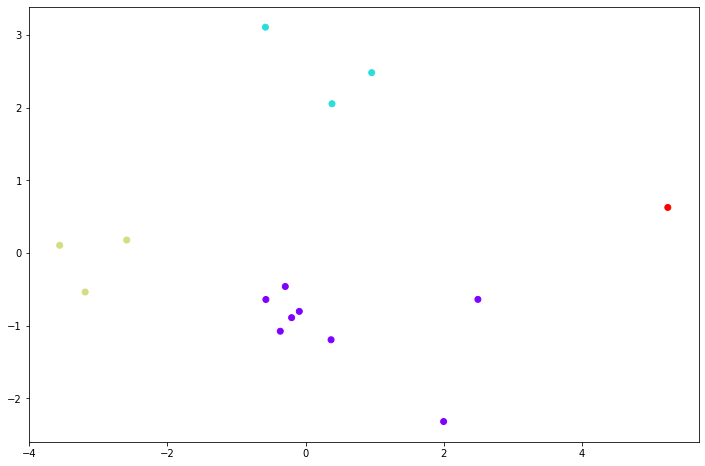

In [0]:
from sklearn.decomposition import PCA
plt.figure(figsize=(12, 8))

pca = PCA(n_components=2)
X = pca.fit_transform(new_df)
y_pred = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow')
plt.show()

In [0]:
merge_data = pd.merge(df,predict,left_index=True,right_index=True,how='outer')
one = merge_data[merge_data['predict']==0]
two = merge_data[merge_data['predict']==1]
three = merge_data[merge_data['predict']==2]
four = merge_data[merge_data['predict']==3]

In [0]:
merge_data.sort_values(by='predict')

,province,city,dong,address,latitude,longitude,pop,pop_per_hs,highschool,sort_10_14,sort_15_19,ratio_10_14,ratio_15_19,predict
0,서울특별시,동작구,노량진1동,서울시 동작구 노량진1동,37.512307,126.942016,32563,2.13,n,933,1131,2.904913,3.521390,0
5,서울특별시,동작구,사당3동,서울시 동작구 사당3동,37.486625,126.972085,26034,2.43,n,808,881,3.167261,3.453412,0
8,서울특별시,동작구,상도1동,서울시 동작구 상도1동,37.503243,126.949750,48153,2.15,n,1569,1925,3.435817,4.215390,0
9,서울특별시,동작구,상도2동,서울시 동작구 상도2동,37.505467,126.942311,29270,2.25,n,929,1059,3.250866,3.705777,0
10,서울특별시,동작구,상도3동,서울시 동작구 상도3동,37.499204,126.931342,26041,2.15,n,731,1038,2.873428,4.080189,0
11,서울특별시,동작구,상도4동,서울시 동작구 상도4동,37.500559,126.937805,29893,2.19,n,883,1128,3.012521,3.848385,0
12,서울특별시,동작구,신대방1동,서울시 동작구 신대방1동,37.488947,126.910048,26599,2.41,n,1245,1372,5.260489,5.797101,0
14,서울특별시,동작구,흑석동,서울시 동작구 흑석동,37.505775,126.966591,35551,2.29,n,993,1250,3.037905,3.824150,0
4,서울특별시,동작구,사당2동,서울시 동작구 사당2동,37.488753,126.979253,28290,2.33,y,785,953,2.840190,3.448026,1
7,서울특별시,동작구,사당5동,서울시 동작구 사당5동,37.485625,126.967016,12886,2.25,y,447,503,3.366978,3.788792,1


-클러스터 1 : 대방동, 신대방1동</br>
<br>- 클러스터 2 : 사당2동, 사당5동, 신대방2동</br>
<br>- 클러스터 3 : 노량진1동, 사당3동, 상도1동,상도2동,상도3동, 상도4동,흑석동</br>
<br>- 클러스터 4 : 노량진2동, 사당1동</br>

In [0]:
one.describe().iloc[1:5,2:8]

,pop,pop_per_hs,sort_10_14,sort_15_19,ratio_10_14,ratio_15_19
mean,31763.000000,2.25000,1011.375000,1223.00000,3.367900,4.055724
std,7421.615284,0.11808,271.304751,318.77175,0.786903,0.748890
min,26034.000000,2.13000,731.000000,881.00000,2.873428,3.453412
25%,26459.500000,2.15000,864.250000,1053.75000,2.985619,3.659680


클러스터 1 특징 : 거주인구가 많고 10대 비율이 타 지역보다 많다.
이 중 <b>대방동</b>은 이미 고등학교가 4개 설립되어 있다.

In [0]:
two.describe().iloc[1:5,2:8]

,pop,pop_per_hs,sort_10_14,sort_15_19,ratio_10_14,ratio_15_19
mean,20631.666667,2.256667,698.333333,783.333333,3.485575,3.879675
std,7702.371345,0.070238,221.127414,244.561512,0.712129,0.483539
min,12886.000000,2.190000,447.000000,503.000000,2.840190,3.448026
25%,16802.500000,2.220000,616.000000,698.500000,3.103584,3.618409


클러스터 2 특징 : 2번째로 10대 비율이 많고, 이미 모두 고등학교가 설립된 지역

In [0]:
three.describe().iloc[1:5,2:8]

,pop,pop_per_hs,sort_10_14,sort_15_19,ratio_10_14,ratio_15_19
mean,17578.666667,1.886667,309.000000,492.333333,1.873102,2.979661
std,5612.168595,0.184752,78.083289,113.465119,0.351307,0.281750
min,13789.000000,1.780000,222.000000,400.000000,1.599623,2.654602
25%,14355.000000,1.780000,277.000000,429.000000,1.674999,2.892578


클러스터 3 특징 : 고등학교가 설립되어 있지 않으며, 2번째 클러스터와 10대 비율이 비슷함.
<br> <b>흑석동이 포함되어 있음<b> </br>

In [0]:
four.describe().iloc[1:5,2:8]

,pop,pop_per_hs,sort_10_14,sort_15_19,ratio_10_14,ratio_15_19
mean,40177.0,2.32,1964.0,2419.0,4.970516,6.122036
std,NaN,NaN,NaN,NaN,NaN,NaN
min,40177.0,2.32,1964.0,2419.0,4.970516,6.122036
25%,40177.0,2.32,1964.0,2419.0,4.970516,6.122036


클러스터 4 특징 : 10대 비율 낮음, 가구원수 적음

세대당 가구원수가 다른 지역에 비해 훨씬 적음 (1인가구 및 고시원 영향인듯.)
<br> 가장 중요한 건 10대 비율이 낮다. </br>

In [0]:
merge_data_1 = merge_data[['dong','pop','pop_per_hs','sort_10_14','sort_15_19','ratio_10_14','ratio_15_19']]
merge_data_1.style.bar()

,dong,pop,pop_per_hs,sort_10_14,sort_15_19,ratio_10_14,ratio_15_19
0,노량진1동,32563,2.130000,933,1131,2.904913,3.521390
1,노량진2동,13789,1.780000,222,400,1.750375,3.153828
2,대방동,40177,2.320000,1964,2419,4.970516,6.122036
3,사당1동,24026,1.780000,373,619,1.599623,2.654602
4,사당2동,28290,2.330000,785,953,2.840190,3.448026
5,사당3동,26034,2.430000,808,881,3.167261,3.453412
6,사당4동,14921,2.100000,332,458,2.269310,3.130554
7,사당5동,12886,2.250000,447,503,3.366978,3.788792
8,상도1동,48153,2.150000,1569,1925,3.435817,4.215390
9,상도2동,29270,2.250000,929,1059,3.250866,3.705777


<h3> 10-14비율 </h3>

/Users/dreamus/anaconda3/envs/py3k/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


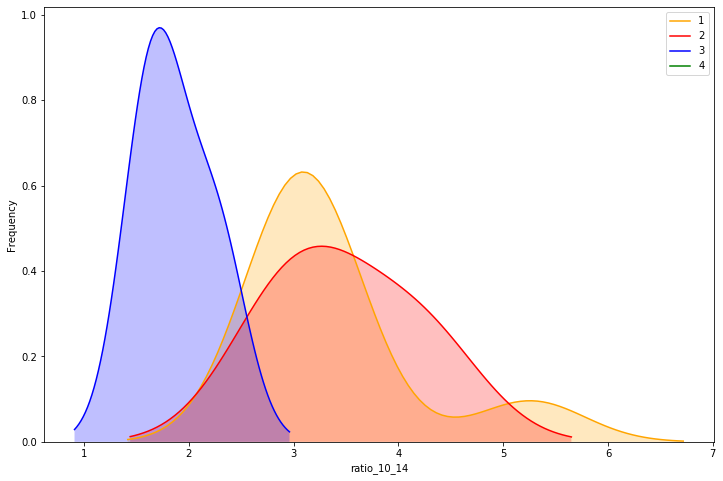

In [0]:
import seaborn as sns

plt.figure(figsize=(12, 8))
g = sns.kdeplot(merge_data['ratio_10_14'][(merge_data['predict'] == 0) & (merge_data["ratio_10_14"].notnull())], color="Orange", shade = True)
g = sns.kdeplot(merge_data['ratio_10_14'][(merge_data['predict'] == 1) & (merge_data["ratio_10_14"].notnull())], color="Red", shade = True)
g = sns.kdeplot(merge_data['ratio_10_14'][(merge_data['predict'] == 2) & (merge_data["ratio_10_14"].notnull())], ax =g, color="Blue", shade= True)
g = sns.kdeplot(merge_data['ratio_10_14'][(merge_data['predict'] == 3) & (merge_data["ratio_10_14"].notnull())], ax =g, color="Green", shade= True)

g.set_xlabel("ratio_10_14")
g.set_ylabel("Frequency")
g = g.legend(["1","2","3","4"])


<h3> 15-19 비율 </h3>

/Users/dreamus/anaconda3/envs/py3k/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


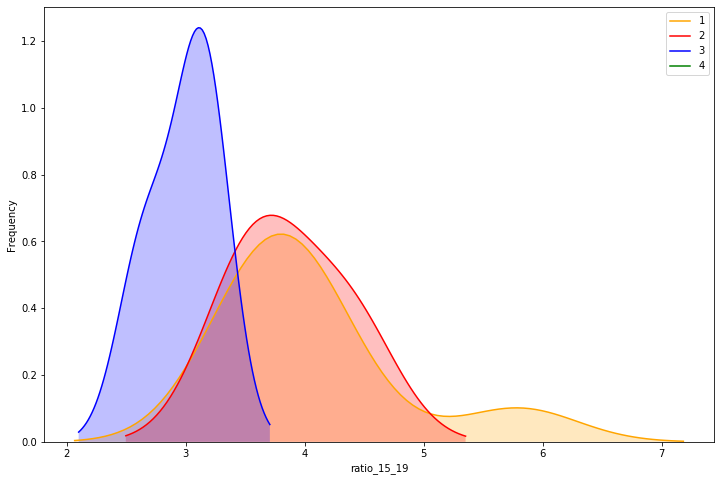

In [0]:
import seaborn as sns

plt.figure(figsize=(12, 8))
g = sns.kdeplot(merge_data['ratio_15_19'][(merge_data['predict'] == 0) & (merge_data["ratio_15_19"].notnull())], color="Orange", shade = True)
g = sns.kdeplot(merge_data['ratio_15_19'][(merge_data['predict'] == 1) & (merge_data["ratio_15_19"].notnull())], color="Red", shade = True)
g = sns.kdeplot(merge_data['ratio_15_19'][(merge_data['predict'] == 2) & (merge_data["ratio_15_19"].notnull())], ax =g, color="Blue", shade= True)
g = sns.kdeplot(merge_data['ratio_15_19'][(merge_data['predict'] == 3) & (merge_data["ratio_15_19"].notnull())], ax =g, color="Green", shade= True)

g.set_xlabel("ratio_15_19")
g.set_ylabel("Frequency")
g = g.legend(["1","2","3","4"])


2번 클러스터는 이미 10대와 많은 고등학교가 설립된 지역이고, 4번은 10대 비중이 너무 적은 지역이기에 베재시키는 게 맞는 것 같음.

-클러스터 1 : 신대방1동
- 클러스터 3 : 노량진1동, 사당3동, 상도1동,상도2동,상도3동, 상도4동,흑석동

<b> 그 중 클러스터 1의 대방동은 이미 고등학교가 4개나 설립이 되어있기에 제외시킴 </b>

<h3> mapping </h3>

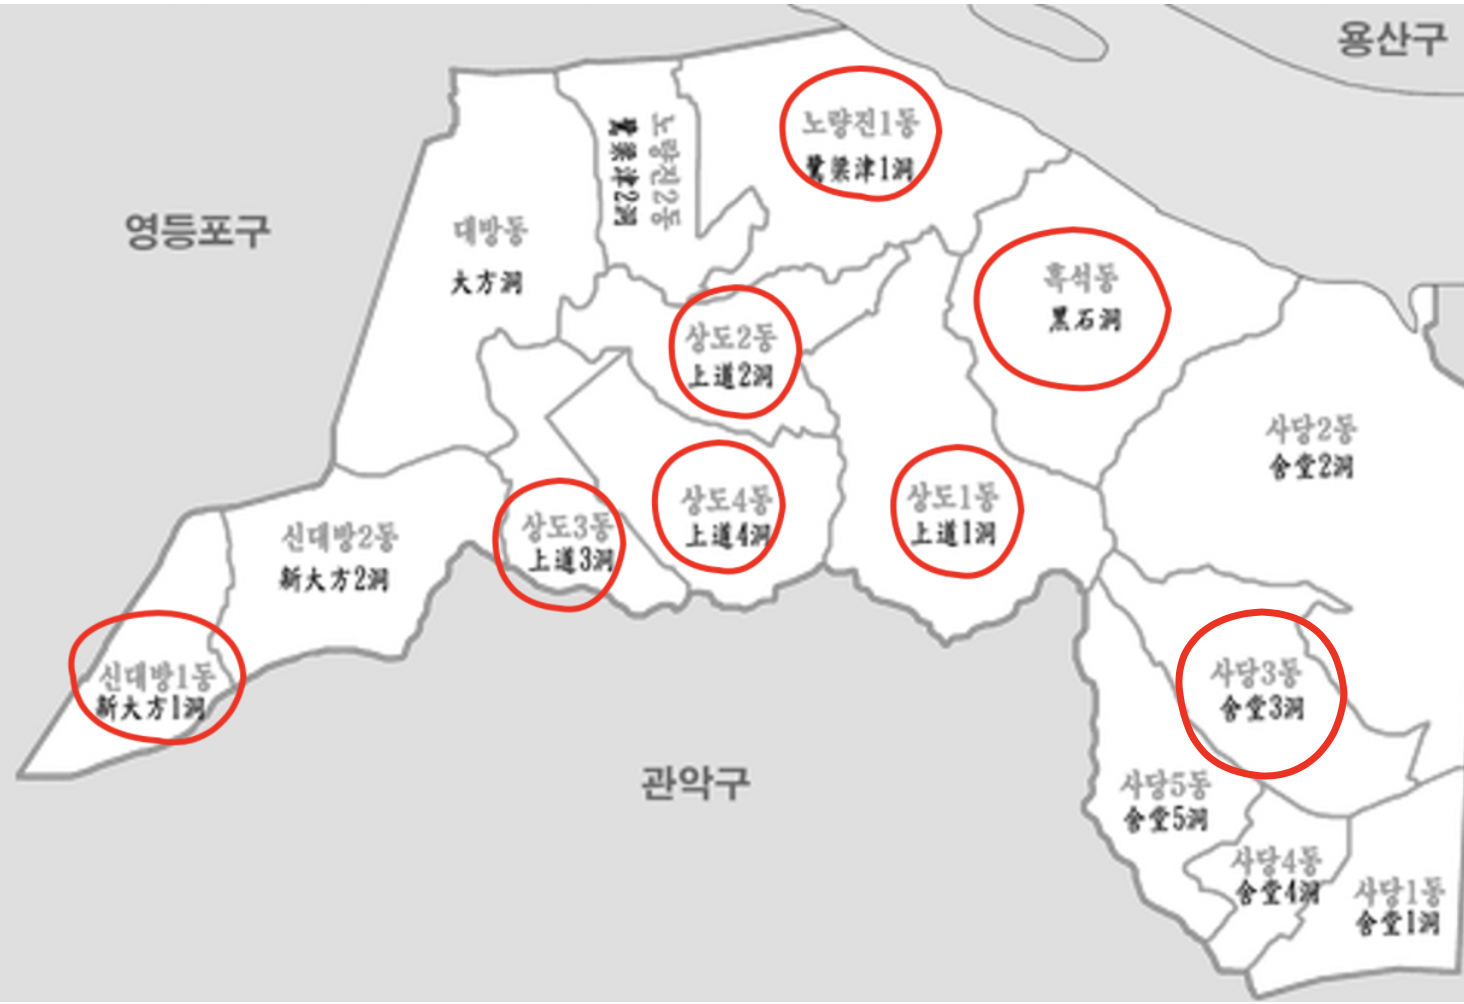

In [0]:
from IPython.display import Image
display(Image("/Users/dreamus/Desktop/dongjak.png",width=850,height=650,unconfined=True))

In [0]:
import folium 
from folium import plugins

one_map = one[['latitude','longitude']]
m = folium.Map([37.498, 126.920], zoom_start=13)

plugins.MousePosition().add_to(m) 

plugins.MarkerCluster(one_map).add_to(m)

m

In [0]:
import folium 
from folium import plugins

two_map = two[['latitude','longitude']]
m = folium.Map([37.491, 126.950], zoom_start=13.5)

plugins.MousePosition().add_to(m) 

plugins.MarkerCluster(two_map).add_to(m)

m

In [0]:
import folium 
from folium import plugins

three_map = three[['latitude','longitude']]
m = folium.Map([37.495, 126.955], zoom_start=14)

plugins.MousePosition().add_to(m) 

plugins.MarkerCluster(three_map).add_to(m)

m

In [0]:
import folium 
from folium import plugins

four_map = four[['latitude','longitude']]
m = folium.Map([37.494, 126.955], zoom_start=13.5)

plugins.MousePosition().add_to(m) 

plugins.MarkerCluster(four_map).add_to(m)

m